### Done by Veronika Karpushenkova

### ChIP-seq annotation

Main reference for ChIPseeker:
https://master.bioconductor.org/packages/release/bioc/vignettes/ChIPseeker/inst/doc/ChIPseeker.html

"ChIP peak data set comparison is also very important. We can use it as an index to estimate how well biological replications are. Even more important is applying to infer cooperative regulation. If two ChIP seq data, obtained by two different binding proteins, overlap significantly, these two proteins may form a complex or have interaction in regulation chromosome remodelling or gene expression. ChIPseeker(Yu, Wang, and He 2015) support statistical testing of significant overlap among ChIP seq data sets, and incorporate open access database GEO for users to compare their own dataset to those deposited in database. Protein interaction hypothesis can be generated by mining data deposited in database. Converting genome coordinations from one genome version to another is also supported, making this comparison available for different genome version and different species.

Several visualization functions are implemented to visualize the coverage of the ChIP seq data, peak annotation, average profile and heatmap of peaks binding to TSS region."

### Uploading packages and files

In [62]:
options(warn = -1)

In [63]:
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg19.knownGene)
library(org.Hs.eg.db)
library(GenomicRanges)
library(ggplot2)
library(DiffBind)
library(tidyverse)
library(stringr)

.broadPeak files:<br>
CnR_H3K27me3_D53_REP1_peaks.broadPeak  CnR_H3K9me3_D53_REP1_peaks.broadPeak  DA735_H3K9me3_REP1_peaks.broadPeak  DA737_H3K9me3_REP1_peaks.broadPeak
CnR_H3K27me3_D53_REP2_peaks.broadPeak  CnR_H3K9me3_D53_REP2_peaks.broadPeak  DA736_H3K9me3_REP1_peaks.broadPeak

In [65]:
# loading TxDb object for annotation
txdb <- TxDb.Hsapiens.UCSC.hg19.knownGene

In [66]:
samples <- data.frame(
  SampleID = c("iPSC_H3K27me3_r1", "iPSC_H3K9me3_r1", "iPSC_H3K27me3_r2", "iPSC_H3K9me3_r2",
               "pm735_H3K9me3", "pm736_H3K9me3", "pm737_H3K9me3"),
  Condition = c("iPSC", "iPSC", "iPSC", "iPSC", "Neuron", "Neuron", "Neuron"),
  Factor = c("H3K27me3", "H3K9me3", "H3K27me3", "H3K9me3", "H3K9me3", "H3K9me3", "H3K9me3"),
  Replicate = c(1,1,2,2,1,1,1),
  Peaks = c(
    "/home/Veronika.Karpushenko/final_project/chipseq/peaks/CnR_H3K27me3_D53_REP1_peaks.broadPeak",
    "/home/Veronika.Karpushenko/final_project/chipseq/peaks/CnR_H3K9me3_D53_REP1_peaks.broadPeak",
    "/home/Veronika.Karpushenko/final_project/chipseq/peaks/CnR_H3K27me3_D53_REP2_peaks.broadPeak",
    "/home/Veronika.Karpushenko/final_project/chipseq/peaks/CnR_H3K9me3_D53_REP2_peaks.broadPeak",
    "/home/Veronika.Karpushenko/final_project/chipseq/peaks/DA735_H3K9me3_REP1_peaks.broadPeak",
    "/home/Veronika.Karpushenko/final_project/chipseq/peaks/DA736_H3K9me3_REP1_peaks.broadPeak",
    "/home/Veronika.Karpushenko/final_project/chipseq/peaks/DA737_H3K9me3_REP1_peaks.broadPeak"
  ),
  PeakCaller = "broadPeak",
  bamReads = NA,
  bamControl = NA,
  stringsAsFactors = FALSE
)

# save to CSV
write.csv(samples, "samples.csv", row.names = FALSE)

In [67]:
head(samples)

,SampleID,Condition,Factor,Replicate,Peaks,PeakCaller,bamReads,bamControl
,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<lgl>,<lgl>
1,iPSC_H3K27me3_r1,iPSC,H3K27me3,1,/home/Veronika.Karpushenko/final_project/chipseq/peaks/CnR_H3K27me3_D53_REP1_peaks.broadPeak,broadPeak,NA,NA
2,iPSC_H3K9me3_r1,iPSC,H3K9me3,1,/home/Veronika.Karpushenko/final_project/chipseq/peaks/CnR_H3K9me3_D53_REP1_peaks.broadPeak,broadPeak,NA,NA
3,iPSC_H3K27me3_r2,iPSC,H3K27me3,2,/home/Veronika.Karpushenko/final_project/chipseq/peaks/CnR_H3K27me3_D53_REP2_peaks.broadPeak,broadPeak,NA,NA
4,iPSC_H3K9me3_r2,iPSC,H3K9me3,2,/home/Veronika.Karpushenko/final_project/chipseq/peaks/CnR_H3K9me3_D53_REP2_peaks.broadPeak,broadPeak,NA,NA
5,pm735_H3K9me3,Neuron,H3K9me3,1,/home/Veronika.Karpushenko/final_project/chipseq/peaks/DA735_H3K9me3_REP1_peaks.broadPeak,broadPeak,NA,NA
6,pm736_H3K9me3,Neuron,H3K9me3,1,/home/Veronika.Karpushenko/final_project/chipseq/peaks/DA736_H3K9me3_REP1_peaks.broadPeak,broadPeak,NA,NA


In [68]:
# loading peak files
iPSC_H3K27me3_r1 <- readPeakFile("/home/Veronika.Karpushenko/final_project/chipseq/peaks/CnR_H3K27me3_D53_REP1_peaks.broadPeak")
iPSC_H3K9me3_r1 <- readPeakFile("/home/Veronika.Karpushenko/final_project/chipseq/peaks/CnR_H3K9me3_D53_REP1_peaks.broadPeak")
iPSC_H3K27me3_r2 <- readPeakFile("/home/Veronika.Karpushenko/final_project/chipseq/peaks/CnR_H3K27me3_D53_REP2_peaks.broadPeak")
iPSC_H3K9me3_r2 <- readPeakFile("/home/Veronika.Karpushenko/final_project/chipseq/peaks/CnR_H3K9me3_D53_REP2_peaks.broadPeak")
pm735_H3K9me3 <- readPeakFile("/home/Veronika.Karpushenko/final_project/chipseq/peaks/DA735_H3K9me3_REP1_peaks.broadPeak")
pm736_H3K9me3 <- readPeakFile("/home/Veronika.Karpushenko/final_project/chipseq/peaks/DA736_H3K9me3_REP1_peaks.broadPeak")
pm737_H3K9me3 <- readPeakFile("/home/Veronika.Karpushenko/final_project/chipseq/peaks/DA737_H3K9me3_REP1_peaks.broadPeak")

### ChIP peaks coverage plot

Between iPSC H3K27me3 replicates on chr1:

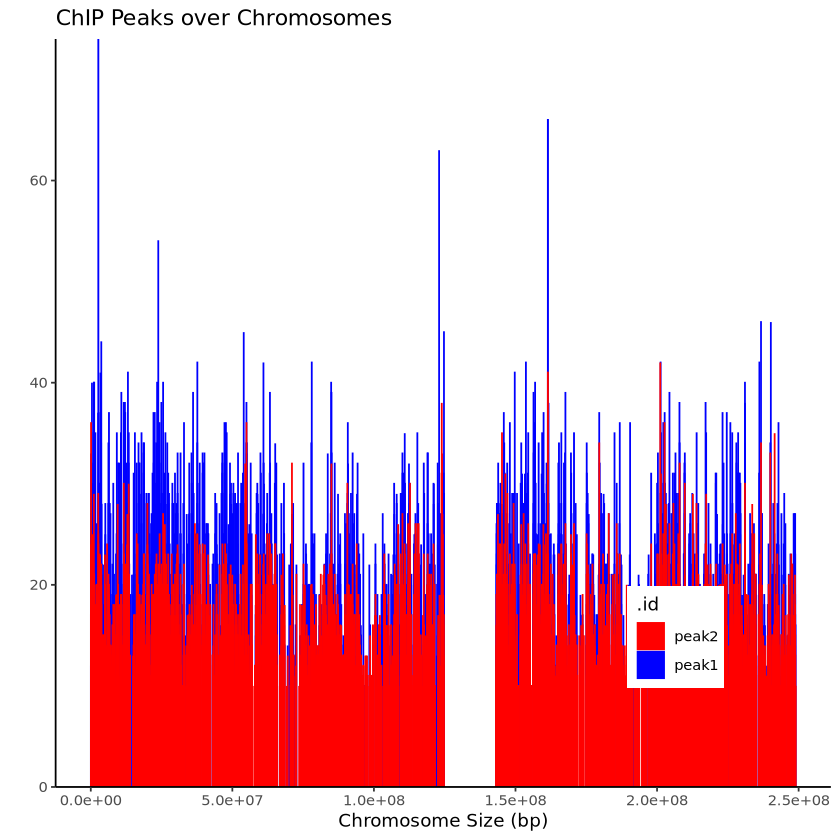

In [69]:
peaks <- list(iPSC_H3K27me3_r1, iPSC_H3K27me3_r2)

covplot(peaks, chrs = "chr1", weightCol = "V5", fill_color = c("red","blue")) +
  theme(legend.position = "inside",
        legend.position.inside = c(0.8,0.2))

Between iPSC H3K9me3 replicates on chr1:

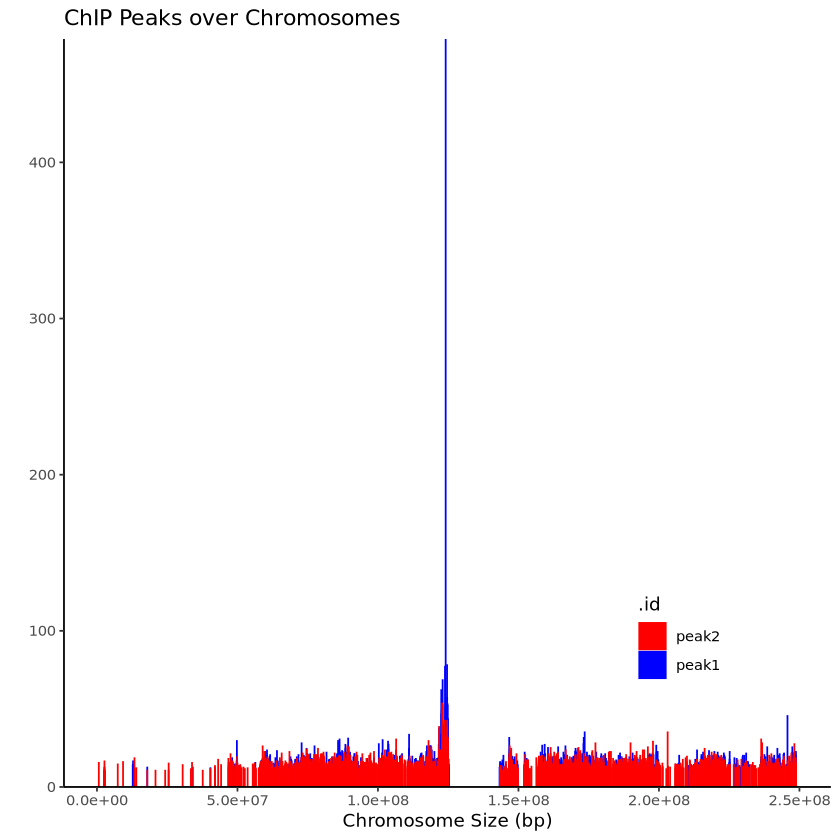

In [70]:
peaks <- list(iPSC_H3K9me3_r1, iPSC_H3K9me3_r2)

covplot(peaks, chrs = "chr1", weightCol = "V5", fill_color = c("red","blue")) +
  theme(legend.position = "inside",
        legend.position.inside = c(0.8,0.2))

Between PM replicates

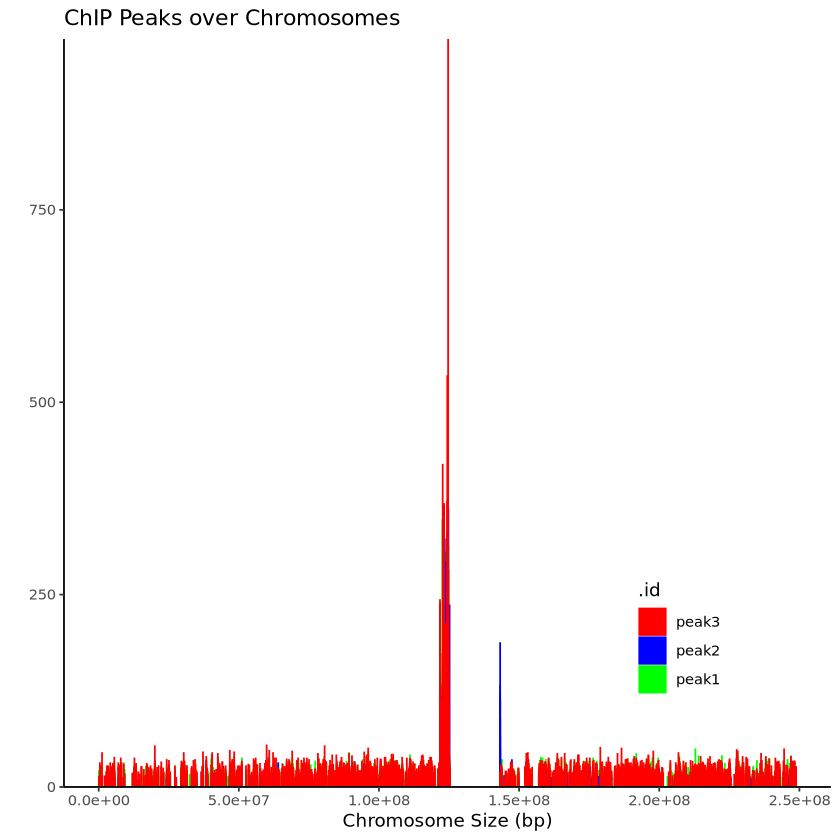

In [71]:
peaks <- list(pm735_H3K9me3, pm736_H3K9me3, pm737_H3K9me3)

covplot(peaks, chrs = "chr1", weightCol = "V5", fill_color = c("red","blue", "green")) +
  theme(legend.position = "inside",
        legend.position.inside = c(0.8,0.2))

We can see good reproducibility between peaks

### Taking consensus peaks of replicates

In [79]:
library(GenomicRanges)

In [81]:
# finding consensus peaks between replicates
consensus_iPSC_H3K27me3 <- GenomicRanges::reduce(GRangesList(iPSC_H3K27me3_r1, iPSC_H3K27me3_r2))
consensus_iPSC_H3K9me3 <- GenomicRanges::reduce(GRangesList(iPSC_H3K9me3_r1, iPSC_H3K9me3_r2))

In [83]:
# combining pm replicates
consensus_pm_H3K9me3 <- GenomicRanges::reduce(GRangesList(pm735_H3K9me3, pm736_H3K9me3, pm737_H3K9me3))

In [88]:
consensus_iPSC_H3K27me3_gr <- unlist(consensus_iPSC_H3K27me3)
consensus_pm_H3K9me3_gr <- unlist(consensus_pm_H3K9me3)
consensus_iPSC_H3K9me3_gr <- unlist(consensus_iPSC_H3K9me3)

In [89]:
# identifying peaks unique to one cell type or modification
unique_iPSC_H3K9me3_vs_H3K27me3 <- GenomicRanges::setdiff(consensus_iPSC_H3K9me3_gr, consensus_iPSC_H3K27me3_gr)
unique_pm_vs_iPSC_H3K9me3 <- GenomicRanges::setdiff(consensus_pm_H3K9me3_gr, consensus_iPSC_H3K9me3_gr)

Coverage plot between H3K27me3 and H3K9me3 for iPSC:

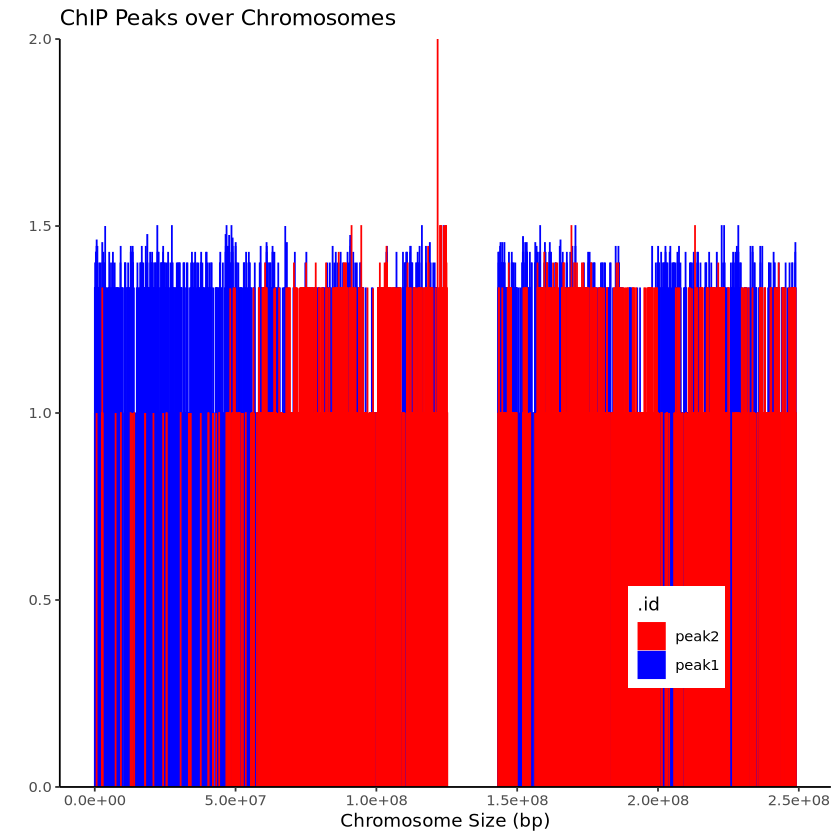

In [93]:
peaks <- list(consensus_iPSC_H3K27me3_gr, consensus_iPSC_H3K9me3_gr)

covplot(peaks, chrs = "chr1", fill_color = c("red","blue")) +
  theme(legend.position = "inside",
        legend.position.inside = c(0.8,0.2))

Coverage plot between iPSC H3K9me3 and pm H3K9me3

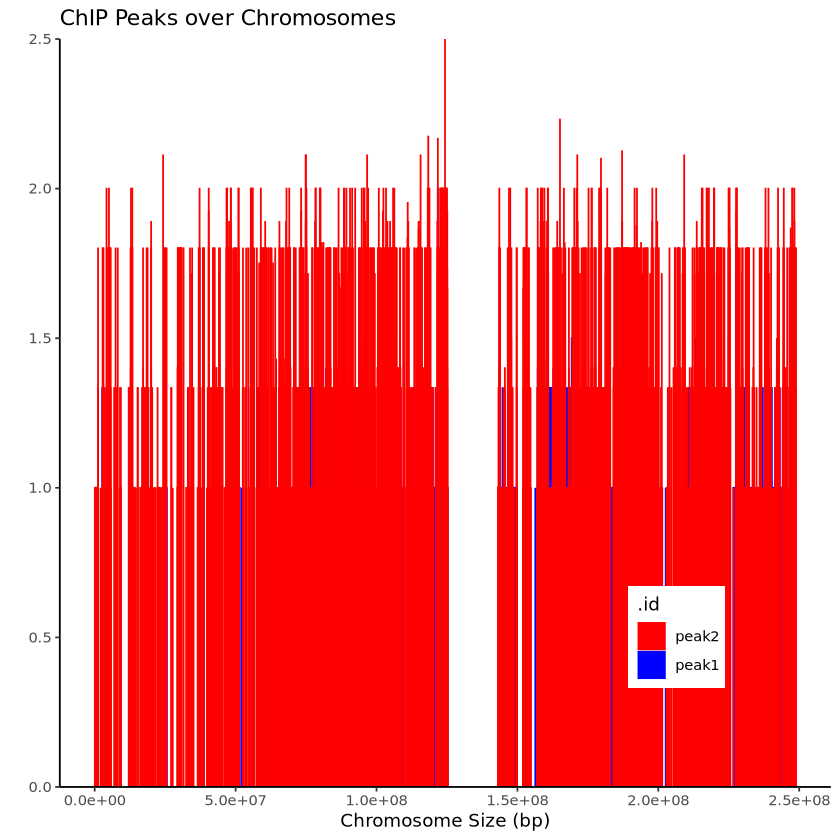

In [94]:
peaks <- list(consensus_iPSC_H3K9me3_gr, consensus_pm_H3K9me3_gr)

covplot(peaks, chrs = "chr1", fill_color = c("red","blue")) +
  theme(legend.position = "inside",
        legend.position.inside = c(0.8,0.2))

### Annotation of peaks

In [102]:
# annotating unique peaks with ChIPseeker
peak_annotation <- function(peaks_gr) {
  annotatePeak(peaks_gr,
               TxDb = txdb,
               annoDb = "org.Hs.eg.db",
               tssRegion = c(-3000, 3000))
}

In [106]:
# annotating unique iPSC H3K27me3 peaks
anno_unique_iPSC_H3K27me3 <- peak_annotation(consensus_iPSC_H3K27me3_gr)

df_anno_iPSC_H3K27me3 <- as.data.frame(anno_unique_iPSC_H3K27me3)

>> preparing features information...		 2025-05-20 19:28:10 
>> identifying nearest features...		 2025-05-20 19:28:10 
>> calculating distance from peak to TSS...	 2025-05-20 19:28:11 
>> assigning genomic annotation...		 2025-05-20 19:28:11 
>> adding gene annotation...			 2025-05-20 19:28:13 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2025-05-20 19:28:14 
>> done...					 2025-05-20 19:28:14 


In [107]:
# annotating unique iPSC H3K9me3 peaks
anno_unique_iPSC_H3K9me3 <- peak_annotation(consensus_iPSC_H3K9me3_gr)
df_anno_iPSC_H3K9me3 <- as.data.frame(anno_unique_iPSC_H3K9me3)

>> preparing features information...		 2025-05-20 19:28:17 
>> identifying nearest features...		 2025-05-20 19:28:17 
>> calculating distance from peak to TSS...	 2025-05-20 19:28:18 
>> assigning genomic annotation...		 2025-05-20 19:28:18 
>> adding gene annotation...			 2025-05-20 19:28:20 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2025-05-20 19:28:20 
>> done...					 2025-05-20 19:28:20 


In [108]:
# annotating unique pm H3K9me3 peaks
anno_unique_pm_H3K9me3 <- peak_annotation(consensus_pm_H3K9me3_gr)
df_anno_pm_H3K9me3 <- as.data.frame(anno_unique_pm_H3K9me3)

>> preparing features information...		 2025-05-20 19:28:24 
>> identifying nearest features...		 2025-05-20 19:28:24 
>> calculating distance from peak to TSS...	 2025-05-20 19:28:26 
>> assigning genomic annotation...		 2025-05-20 19:28:26 
>> adding gene annotation...			 2025-05-20 19:28:29 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2025-05-20 19:28:29 
>> done...					 2025-05-20 19:28:29 


In [109]:
# annotating unique iPSC H3K9me3 vs H3K27me3 peaks
anno_unique_iPSC_H3K9me3_vs_H3K27me3 <- peak_annotation(unique_iPSC_H3K9me3_vs_H3K27me3)
# annotating unique iPSC and pm H3K9me3 peaks
anno_unique_pm_vs_iPSC_H3K9me3 <- peak_annotation(unique_pm_vs_iPSC_H3K9me3)

>> preparing features information...		 2025-05-20 19:28:30 
>> identifying nearest features...		 2025-05-20 19:28:30 
>> calculating distance from peak to TSS...	 2025-05-20 19:28:31 
>> assigning genomic annotation...		 2025-05-20 19:28:31 
>> adding gene annotation...			 2025-05-20 19:28:34 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2025-05-20 19:28:35 
>> done...					 2025-05-20 19:28:35 
>> preparing features information...		 2025-05-20 19:28:35 
>> identifying nearest features...		 2025-05-20 19:28:35 
>> calculating distance from peak to TSS...	 2025-05-20 19:28:36 
>> assigning genomic annotation...		 2025-05-20 19:28:36 
>> adding gene annotation...			 2025-05-20 19:28:38 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2025-05-20 19:28:38 
>> done...					 2025-05-20 19:28:38 


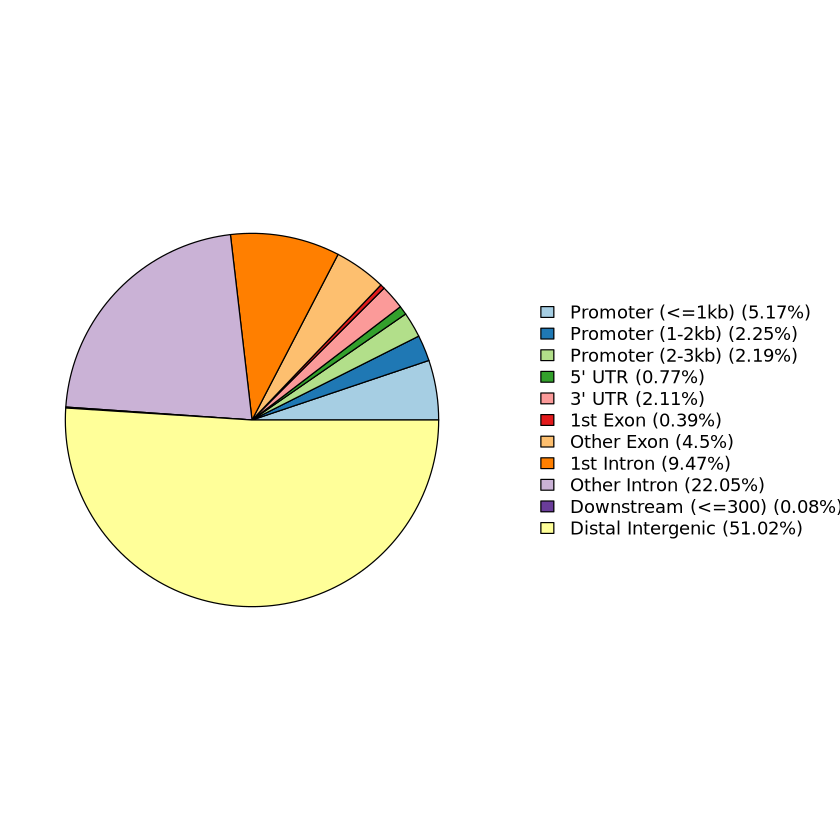

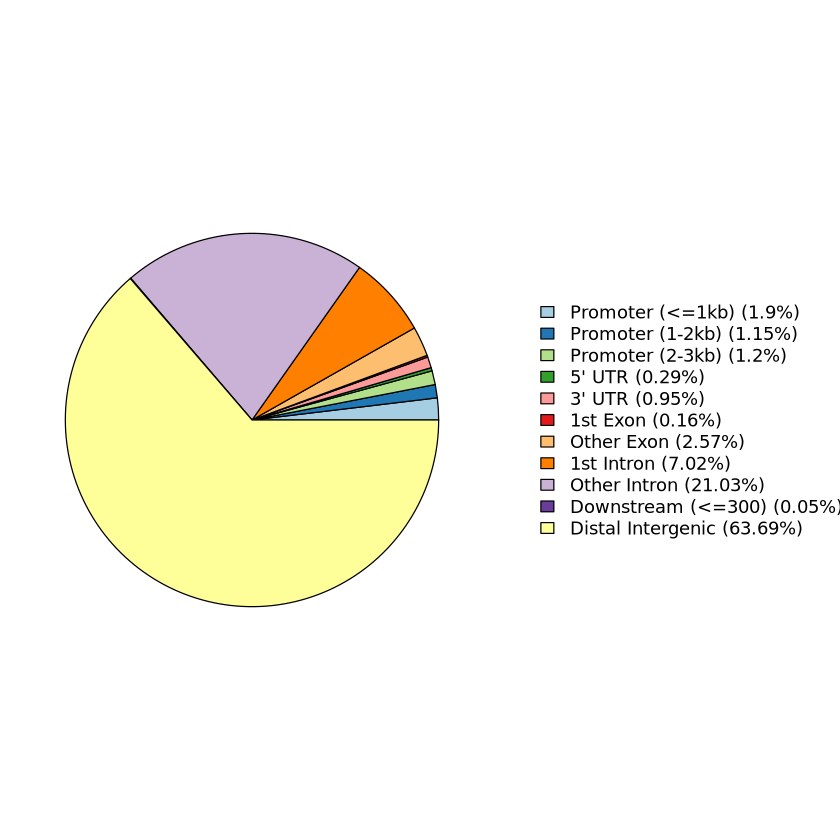

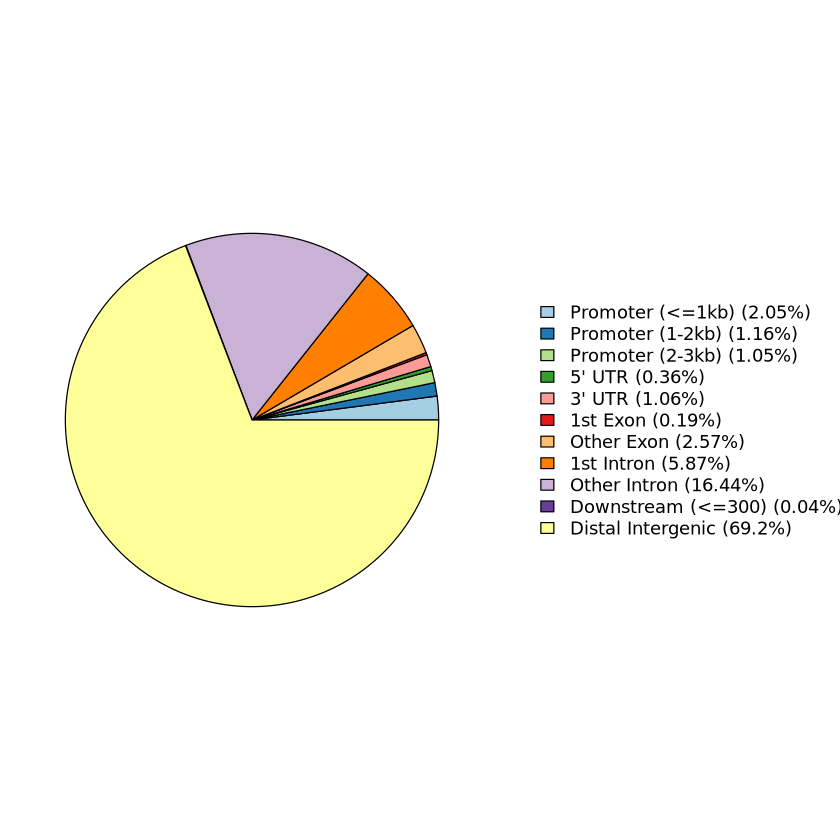

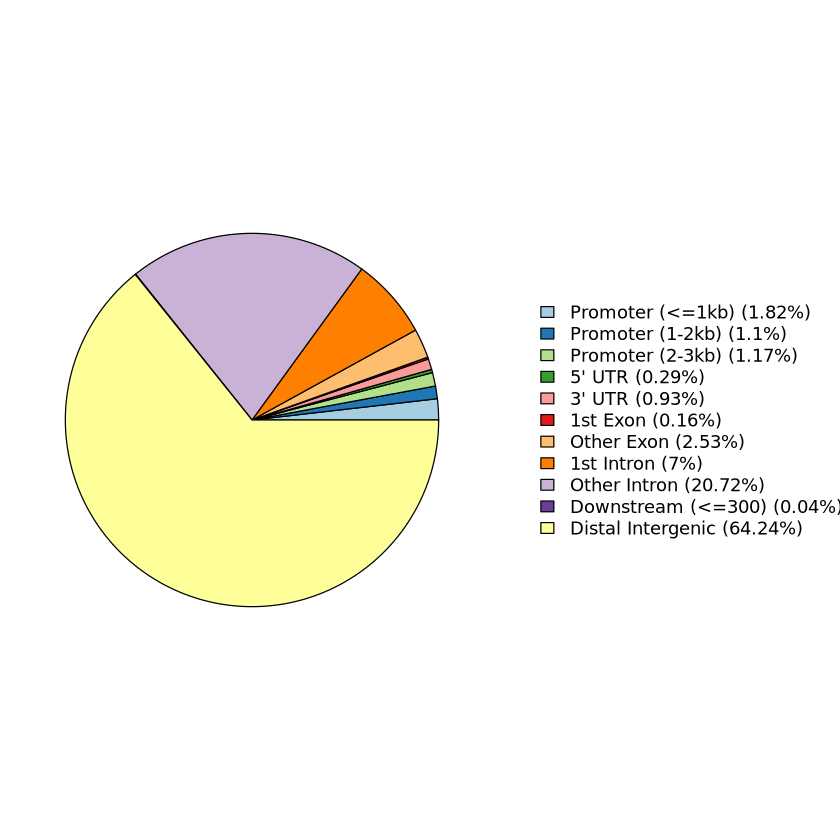

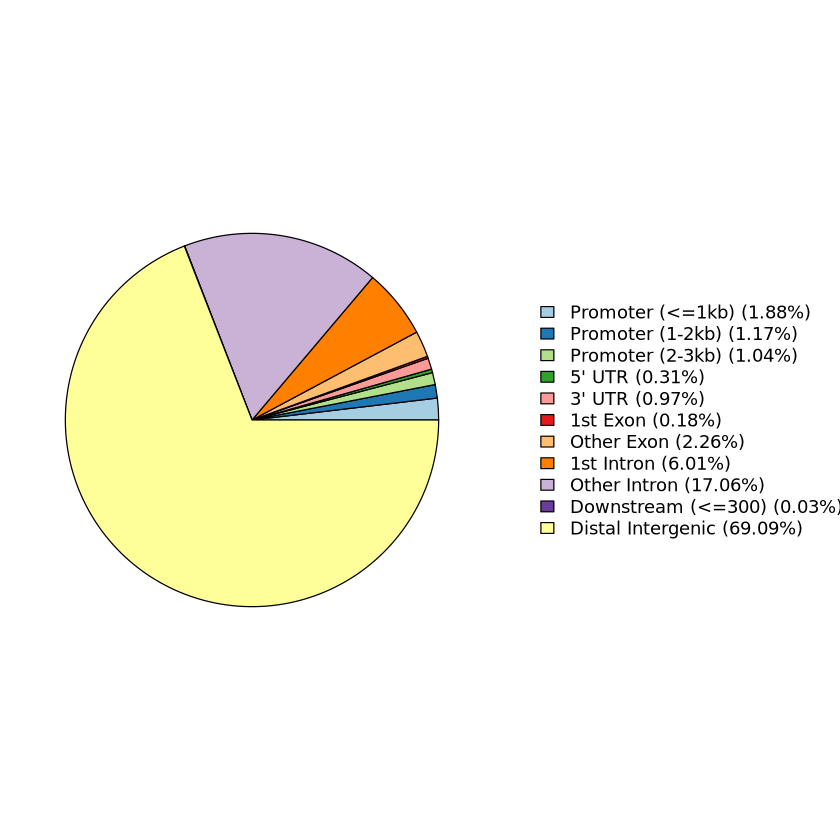

In [110]:
# visualizing annotation distribution
plotAnnoPie(anno_unique_iPSC_H3K27me3)
plotAnnoPie(anno_unique_iPSC_H3K9me3)
plotAnnoPie(anno_unique_pm_H3K9me3)
plotAnnoPie(anno_unique_iPSC_H3K9me3_vs_H3K27me3)
plotAnnoPie(anno_unique_pm_vs_iPSC_H3K9me3)

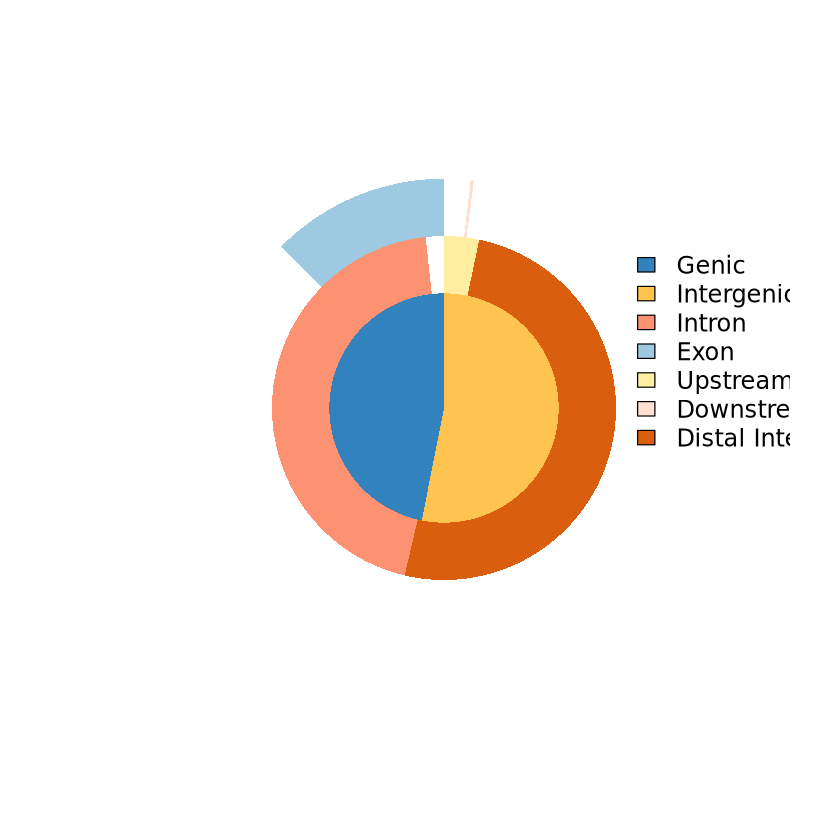

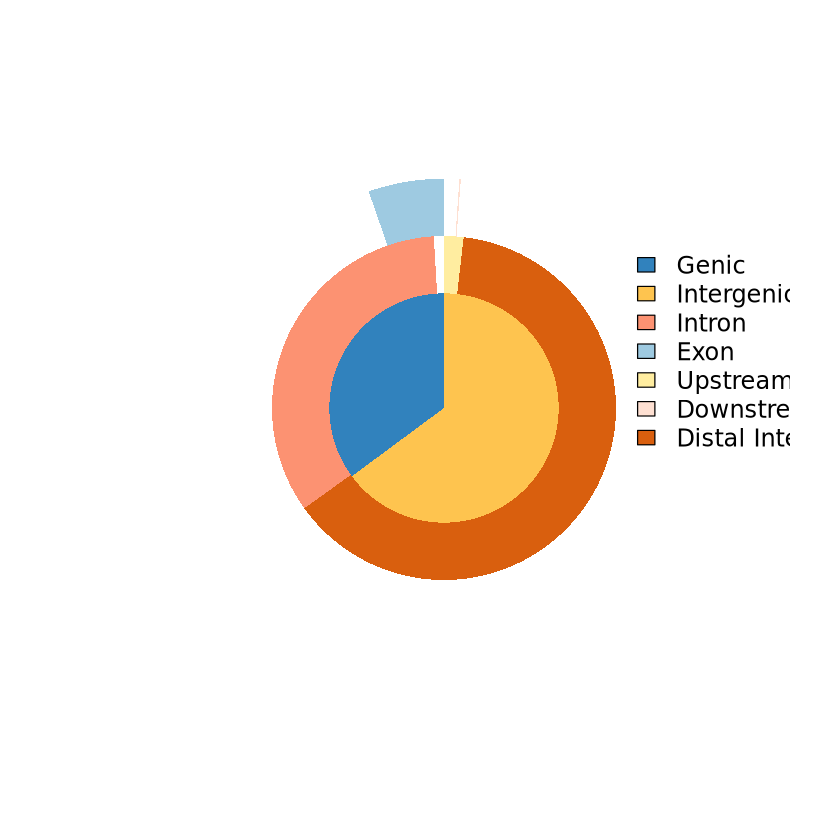

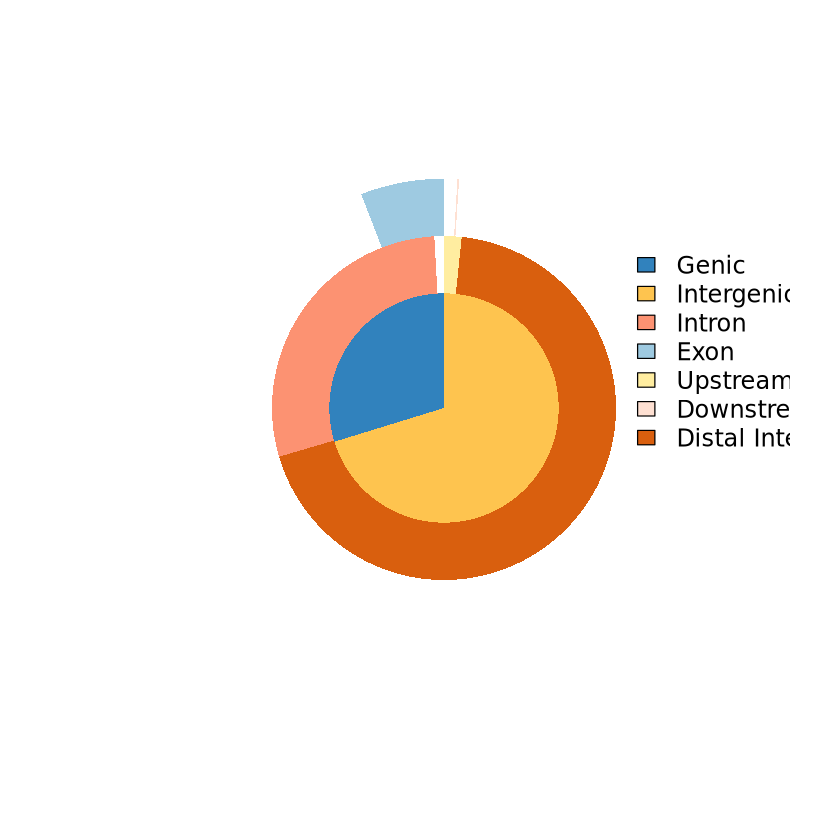

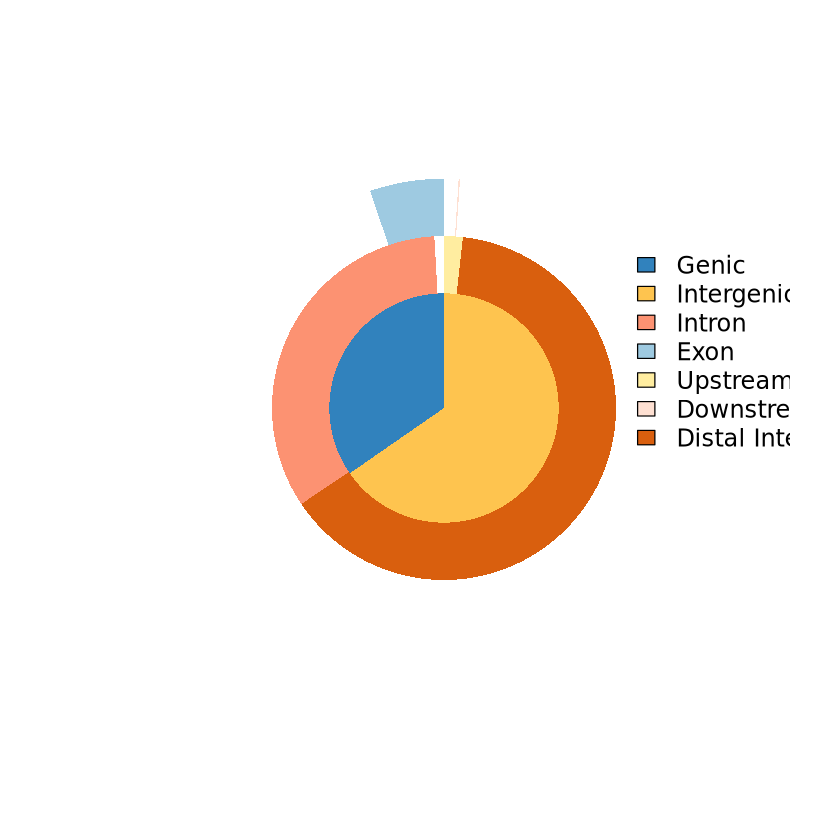

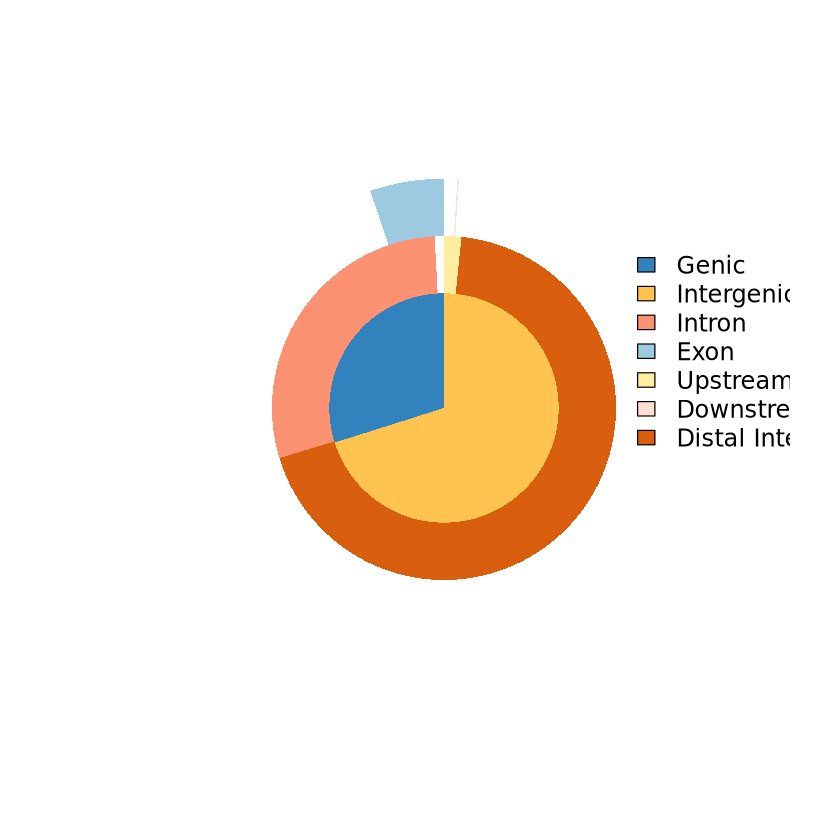

In [129]:
# visualizing annotation distribution
vennpie(anno_unique_iPSC_H3K27me3)
vennpie(anno_unique_iPSC_H3K9me3)
vennpie(anno_unique_pm_H3K9me3)
vennpie(anno_unique_iPSC_H3K9me3_vs_H3K27me3)
vennpie(anno_unique_pm_vs_iPSC_H3K9me3)

### Visualize distribution of TF-binding loci relative to TSS

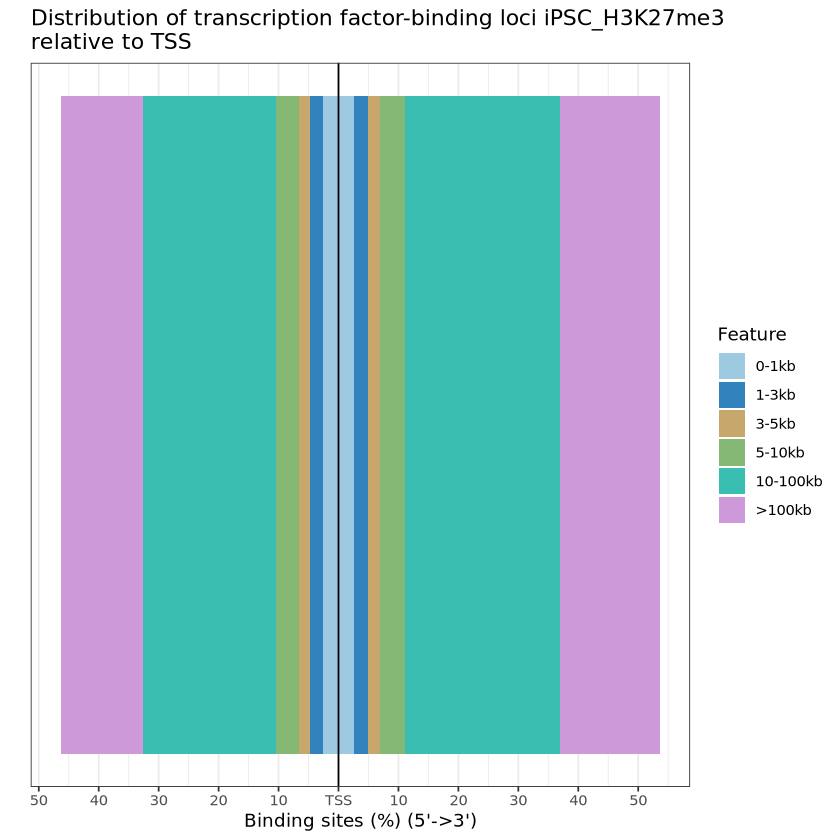

In [120]:
plotDistToTSS(anno_unique_iPSC_H3K27me3,
              title="Distribution of transcription factor-binding loci iPSC_H3K27me3\nrelative to TSS")

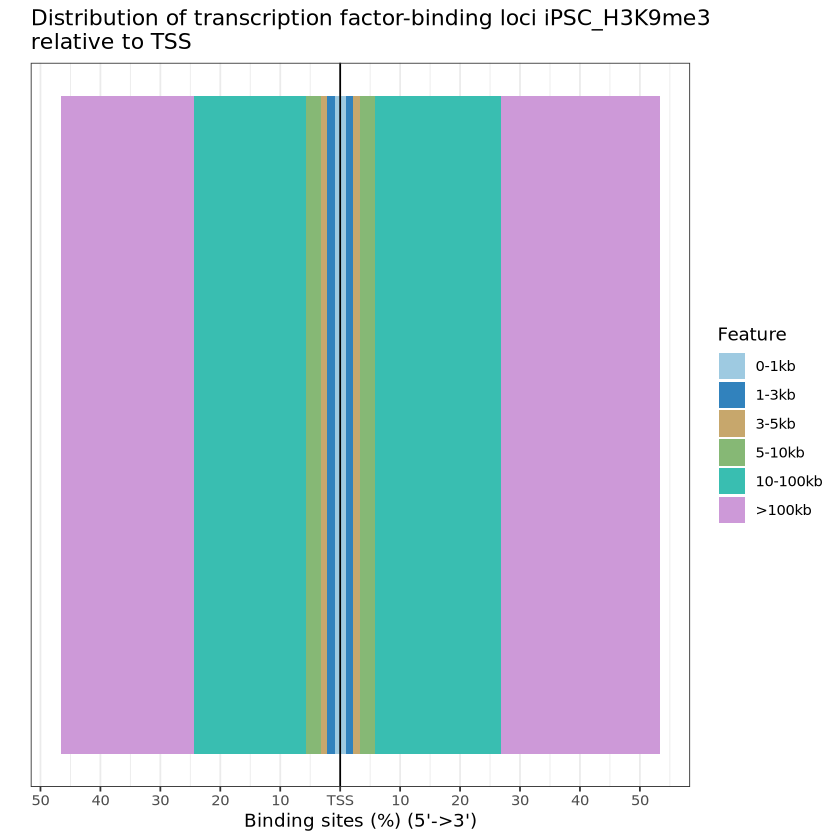

In [121]:
plotDistToTSS(anno_unique_iPSC_H3K9me3,
              title="Distribution of transcription factor-binding loci iPSC_H3K9me3\nrelative to TSS")

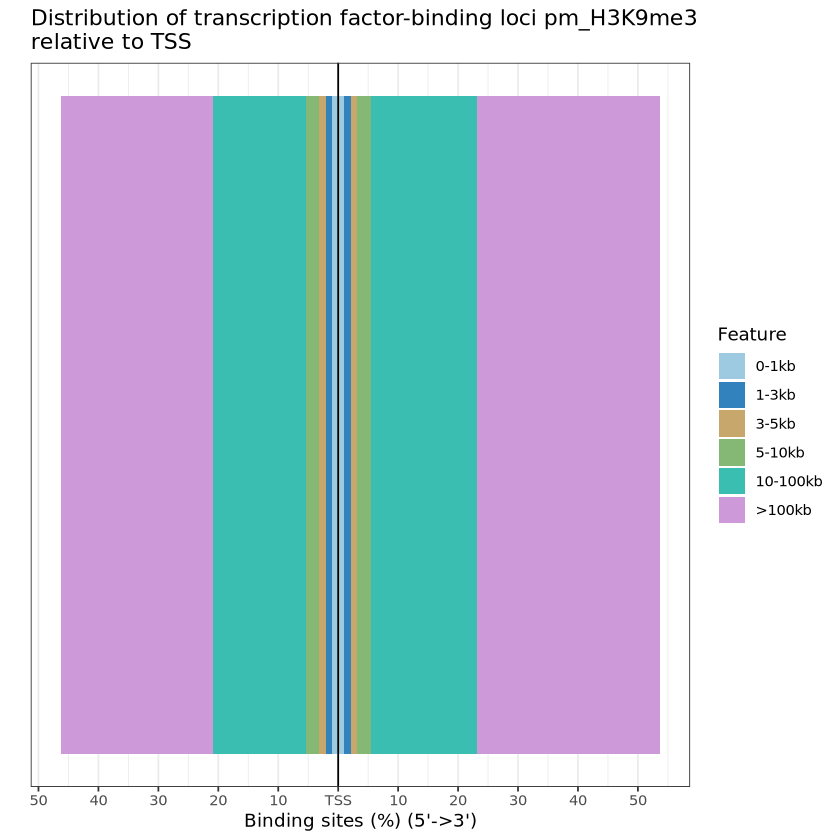

In [122]:
plotDistToTSS(anno_unique_pm_H3K9me3,
              title="Distribution of transcription factor-binding loci pm_H3K9me3\nrelative to TSS")

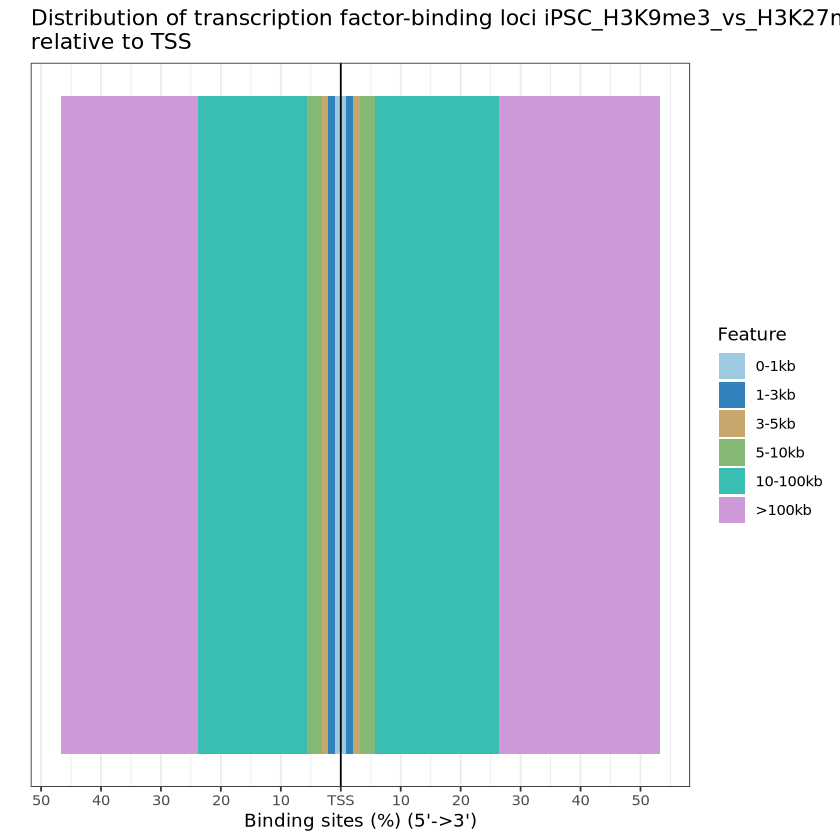

In [123]:
plotDistToTSS(anno_unique_iPSC_H3K9me3_vs_H3K27me3,
              title="Distribution of transcription factor-binding loci iPSC_H3K9me3_vs_H3K27me3\nrelative to TSS")

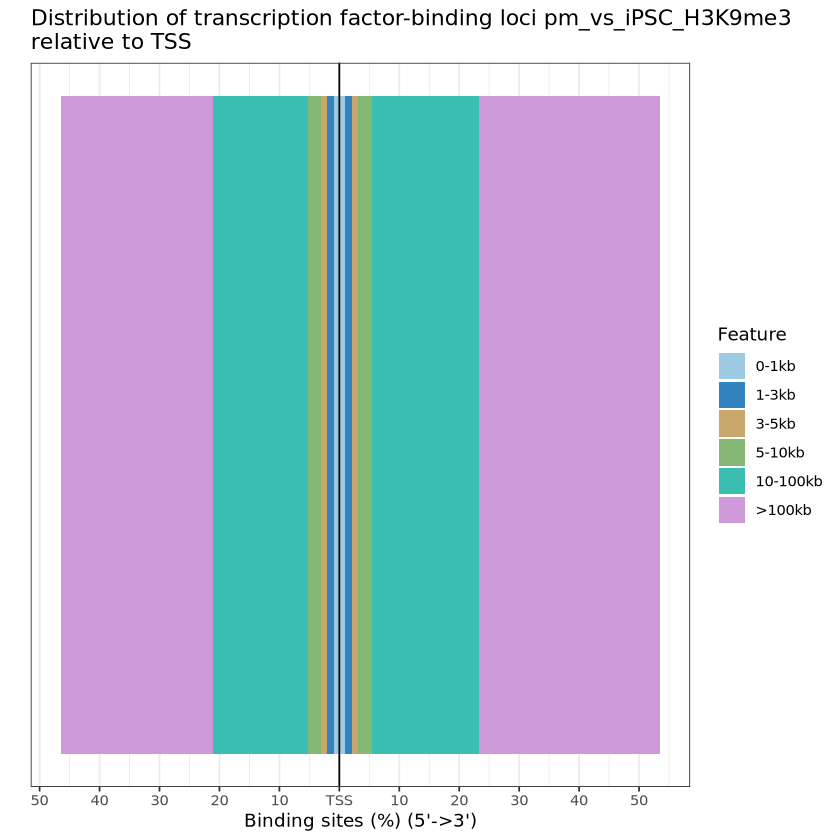

In [124]:
plotDistToTSS(anno_unique_pm_vs_iPSC_H3K9me3,
              title="Distribution of transcription factor-binding loci pm_vs_iPSC_H3K9me3\nrelative to TSS")

In [133]:
peakAnnoList <- list(
  iPSC_H3K27me3 = anno_unique_iPSC_H3K27me3,
  iPSC_H3K9me3 = anno_unique_iPSC_H3K9me3,
  pm_H3K9me3 = anno_unique_pm_H3K9me3,
  iPSC_H3K9me3_vs_H3K27me3 = anno_unique_iPSC_H3K9me3_vs_H3K27me3,
  pm_vs_iPSC_H3K9me3 = anno_unique_pm_vs_iPSC_H3K9me3
)

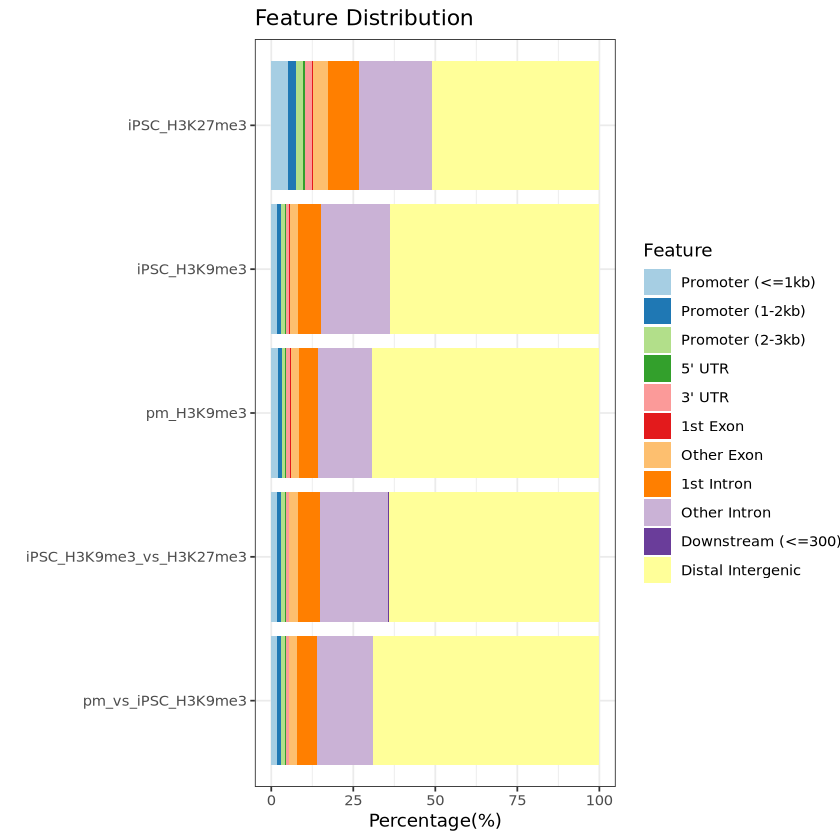

In [135]:
plotAnnoBar(peakAnnoList)

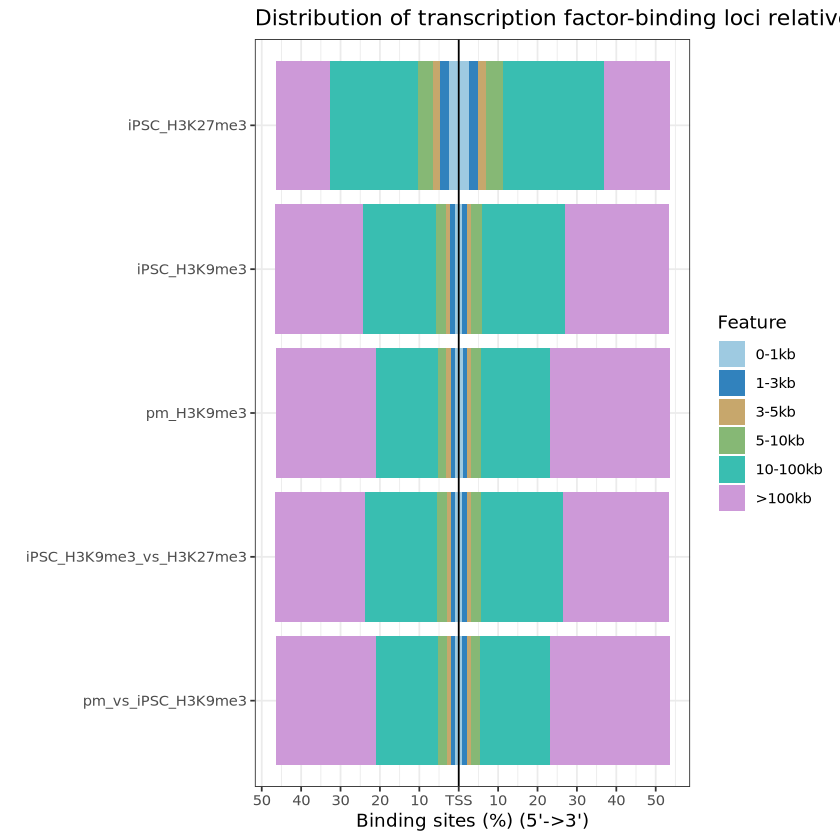

In [136]:
plotDistToTSS(peakAnnoList)

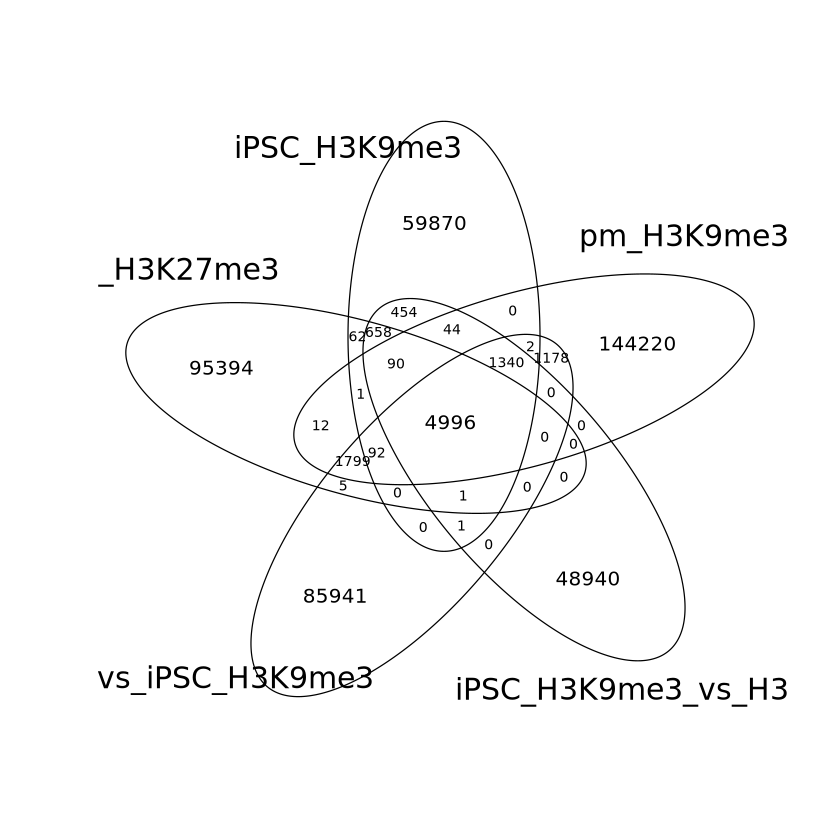

In [137]:
genes <- lapply(peakAnnoList, function(x) as.data.frame(x)$geneId)
vennplot(genes)

clusterProfiler v4.10.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:purrr’:

    simplify


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:IRanges’:

    slice


The following object is masked from ‘package:S4Vectors’:

    rename


The following object is masked from ‘package:stats’:

    filter




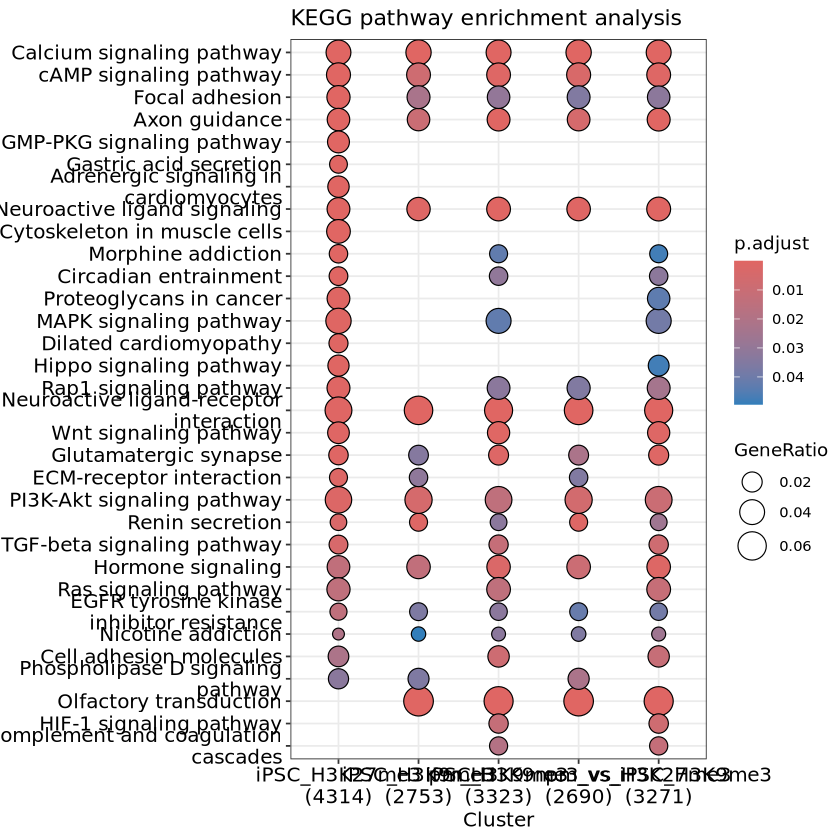

In [138]:
library(clusterProfiler)
library(org.Hs.eg.db)  # or your organism

compKEGG <- compareCluster(
  geneCluster = genes,
  fun = "enrichKEGG",
  pvalueCutoff = 0.05,
  pAdjustMethod = "BH"
)
dotplot(compKEGG, showCategory = 15, title = "KEGG pathway enrichment analysis")

In [142]:
promoter <- getPromoters(TxDb=txdb, upstream=3000, downstream=3000)

In [147]:
peaks_iPSC_H3K27me3 <- consensus_iPSC_H3K27me3_gr
peaks_iPSC_H3K9me3 <- consensus_iPSC_H3K9me3_gr
peaks_pm_H3K9me3 <- consensus_pm_H3K9me3_gr

In [148]:
peaks_list <- list(
  iPSC_H3K27me3 = peaks_iPSC_H3K27me3,
  iPSC_H3K9me3 = peaks_iPSC_H3K9me3,
  pm_H3K9me3 = peaks_pm_H3K9me3
)

In [149]:
tagMatrixList <- lapply(peaks_list, getTagMatrix, windows = promoter)

>> preparing start_site regions by gene... 2025-05-20 20:38:55
>> preparing tag matrix...  2025-05-20 20:38:55 
>> preparing start_site regions by gene... 2025-05-20 20:39:06
>> preparing tag matrix...  2025-05-20 20:39:06 
>> preparing start_site regions by gene... 2025-05-20 20:39:17
>> preparing tag matrix...  2025-05-20 20:39:17 


>> plotting figure...			 2025-05-20 20:42:14 
>> Running bootstrapping for tag matrix...		 2025-05-20 20:42:21 
>> Running bootstrapping for tag matrix...		 2025-05-20 20:42:29 
>> Running bootstrapping for tag matrix...		 2025-05-20 20:42:36 


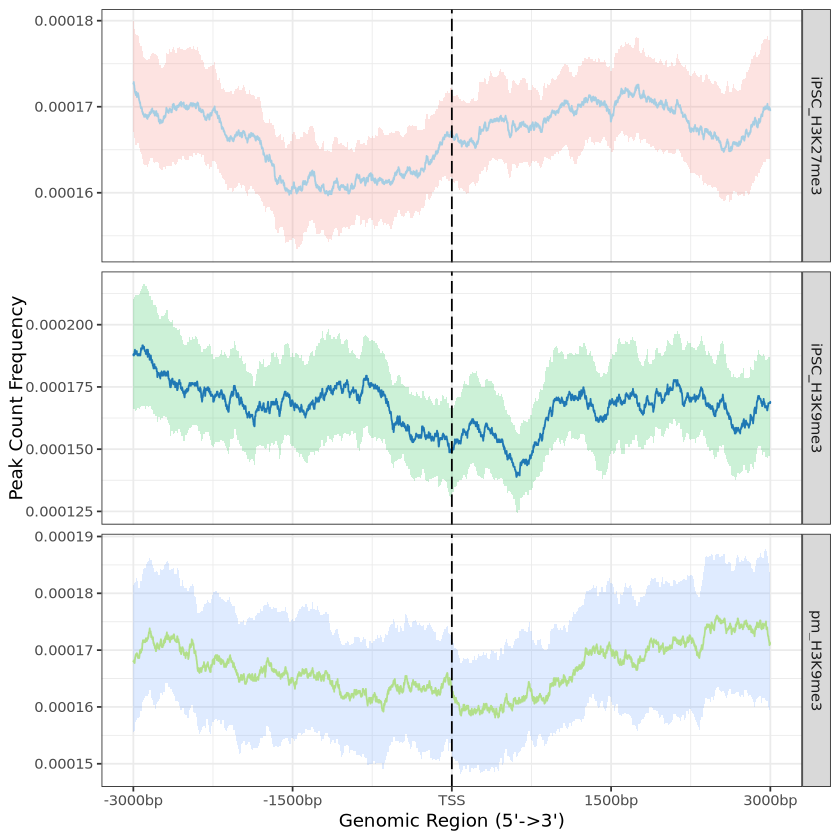

In [151]:
plotAvgProf(tagMatrixList, xlim = c(-3000, 3000), conf = 0.95, resample = 100, facet = "row")

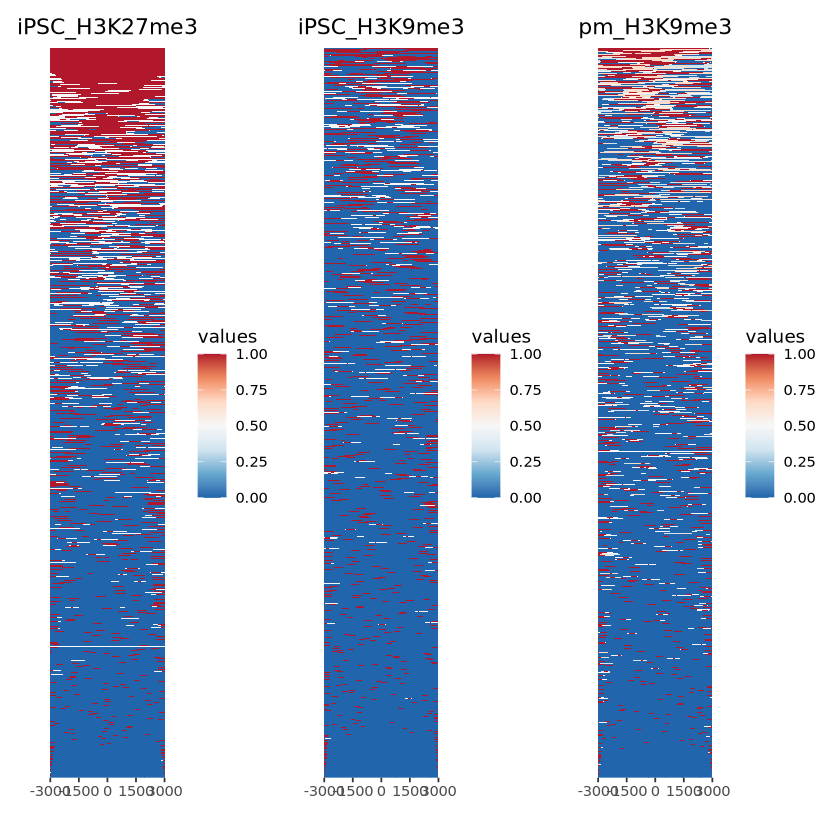

In [145]:
tagHeatmap(tagMatrixList)

Thanks for reading!